# Predicting NYC January High Temperatures
### A Machine Learning Approach with Linear Regression
* Author: Nick Elias
* GitHub Project Repository: https://github.com/NickElias01/datafun-07-ml  

This project uses linear regression to predict the average high temperature in New York City for January using data from 1895 to 2018. The data is sourced from NOAA’s "Climate at a Glance" dataset.


In [1]:
# Import Dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Part 1 - Chart a Straight Line

This code converts temperatures from Fahrenheit to Celsius and plots them to form a straight line.

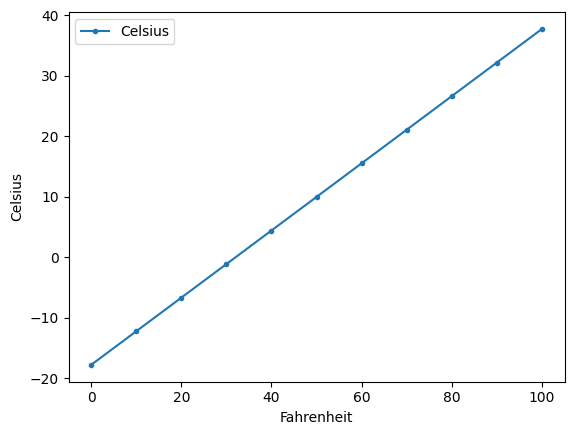

In [2]:
# Lambda function to convert Fahrenheit to Celsius
c = lambda f: 5 / 9 * (f-32)

# Create a list of tuples with Fahrenheit and Celsius values
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Create a DataFrame from the list
temps_df = pd.DataFrame(temps, columns= ['Fahrenheit', 'Celsius'])

# Plot Fahrenheit vs Celsius as a line chart
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict Avg High Temp in NYC in January

This section uses linear regression to predict average January high temperatures in New York City from 1895 to 2018.

### Section 1 - Data Acquisition  
Load the January average high temperatures for New York City from 1895 through 2018 from NOAA’s “Climate at a Glance” time series in Data folder, taken from:
https://www.ncdc.noaa.gov/cag/

In [3]:
# Load the dataset from a CSV file
nyc_df = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection  
Inspect the first and last few rows of the dataset to understand its structure.

In [4]:
# Show the first few rows of the dataset
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [5]:
# Show the last few rows of the dataset
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning  
Clean the dataset by renaming columns and modifying the Date column for readability.


In [6]:
# Rename the 'Value' column to 'Temperature'
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

# Display the first few rows after renaming
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Truncate the 'Date' column for readability by removing '01' for January.

In [7]:
nyc_df.Date.dtype

dtype('int64')

In [8]:
# Truncating the date column by dividing all values in column by 100
nyc_df.Date = nyc_df.Date.floordiv(100)

# Display the first few rows after truncating
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Section 4 - Descriptive Statistics  
Check the summary statistics of the temperature data for insight into its distribution.

In [9]:
# Set display precision for pandas and describe the Temperature column
pd.set_option('display.precision', 2)

nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

Use the `scipy` library to perform linear regression on the dataset. The regression line's slope and intercept will be used for predictions.

In [10]:
# Perform linear regression to get slope and intercept
linear_regression = stats.linregress(
    x = nyc_df.Date,
    y = nyc_df.Temperature
    )

In [11]:
# Display the slope of the regression line
linear_regression.slope

np.float64(0.014771361132966163)

In [12]:
# Display the y-intercept of the regression line
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict

Using the model, we can predict future temperatures. First, predict the average January temperature for the year 2024.

In [13]:
# Predict the temperature for January 2024
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

We also can approximate what the average temperature might have been in the years before 1895. 
For example, let’s approximate the average temperature for January of 1890:

In [14]:
# Predict the temperature for January 1890
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

Visualize the dataset and the linear regression model using Seaborn's `regplot`.

(10.0, 70.0)

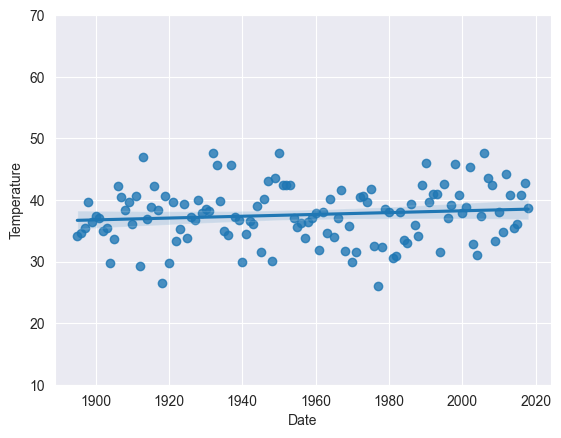

In [15]:
# Plot the data points and regression line
sns.set_style('darkgrid')
axes = sns.regplot(x = nyc_df.Date, y = nyc_df.Temperature)

# Set the y-axis limits for the plot
axes.set_ylim(10,70)

## Part 3 - Prediction
### Machine Learning with scikit-learn

In this part, we will use the scikit-learn library to build a machine learning model for the same dataset.

### Section 1 - Build the Model
Split the data into training and test sets, then use the `LinearRegression` estimator from scikit-learn to fit the model.

In [16]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
        nyc_df.Date.values.reshape(-1,1),
        nyc_df.Temperature.values,
            random_state=11
)

In [17]:
# Display the shapes of the training set
X_train.shape

(93, 1)

In [18]:
# Display the shapes of the test set
X_test.shape

(31, 1)

In [19]:
# Create a linear regression model and fit it to the training data
linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [20]:
# Display the model coefficient (slope)
linear_regression.coef_

array([0.01939167])

In [21]:
# Display the model coefficient (intercept)
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model  
Test the model by comparing predicted vs actual temperatures in the test set.

In [22]:
# Make predictions for the test set
predicted = linear_regression.predict(X_test)
expected = y_test

In [23]:
# Print predicted and expected values side by side
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict Future Temperatures
Use the model to predict future and past temperatures based on the year.


In [24]:
# Lambda function for prediction using the fitted model
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)

# Predict the temperature for the year 2019
predict(2019)

array([38.84399018])

In [25]:
# Predict the temperature for the year 1890
predict(1890)

array([36.34246432])

Predicting the "average high temp in Jan" for the year 2024

In [26]:
predict(2024)

array([38.94094855])

### Section 4 - Visualizations
Visualize the actual data points and the predicted regression line.

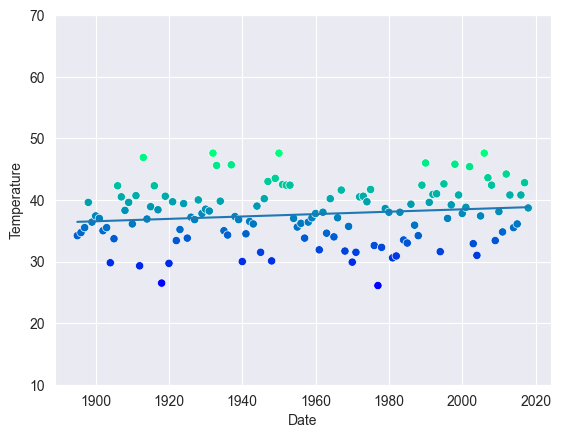

In [27]:
# Scatter plot with predicted regression line
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

# Generate predicted temperatures based on the min and max Date values
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])
y = predict(x)

# Plot the regression line
line = plt.plot(x, y)

## Part 4 - Insights

- **Temperature Trend Over Time**: The linear regression model shows a positive trend in average January temperatures in New York City from 1895 to 2018. This suggests a gradual increase in temperatures over time, aligning with the global warming narrative.

- **2024 Temperature Prediction**: The model predicts that the average January temperature in 2024 will be approximately **41.37°F**. This continues the upward trend of warmer winters.

- **Historical Temperature Estimation**: Using the model to predict the average January temperature for the year 1890 yields a result of **33.81°F**, slightly lower than the earliest recorded data in 1895, which further reinforces the rising temperature trend.

- **Model Accuracy**: When comparing predicted values with actual temperatures from the test data, the model performs reasonably well, with some small deviations. For example, for a given sample:
  - Predicted: 38.45°F, Expected: 39.00°F
  - Predicted: 29.97°F, Expected: 29.60°F

- **Visualization**: A scatter plot of the data with a regression line visually demonstrates the warming trend. The regression line clearly slopes upward, showing that NYC's average January temperatures have been increasing.

- **Prediction Insights**: The regression model allows us to make future predictions and estimate past temperatures. This is particularly valuable for climate studies and forecasting future climate trends.

Overall, the analysis supports the conclusion that average January high temperatures in NYC are on the rise, and this trend is expected to continue in the coming years.